In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import shap

2024-12-03 19:54:41.573571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
df = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')

In [9]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [ ]:
# Filling missing values in the text variable
df['text'].fillna('No review provided', inplace=True)

/var/folders/bc/jvp08fn56knc5yl0j4_qd3pc0000gn/T/ipykernel_3594/1305072871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('No review provided', inplace=True)


In [ ]:
# Encoding the target variable stars
label_encoder = LabelEncoder()
df['stars_encoded'] = label_encoder.fit_transform(df['stars'])

In [ ]:
# Selecting features and target variable
features = ['user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down', 'best_score']
X = df[features]
y = df['stars_encoded']

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# One-hot encode the target
y_categorical = to_categorical(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [16]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7369 - loss: 1.1135 - val_accuracy: 0.7618 - val_loss: 0.8525
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7571 - loss: 0.8749 - val_accuracy: 0.7604 - val_loss: 0.8490
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7560 - loss: 0.8594 - val_accuracy: 0.7607 - val_loss: 0.8417
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7582 - loss: 0.8608 - val_accuracy: 0.7597 - val_loss: 0.8420
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7540 - loss: 0.8564 - val_accuracy: 0.7597 - val_loss: 0.8450
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7628 - loss: 0.8442 - val_accuracy: 0.7607 - val_loss: 0.8414
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7649 - loss: 0.8366 - val_accuracy: 0.7594 - val_loss: 0.8435
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7633 - loss: 0.8437 - val_accuracy: 0.

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generating the classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Convert numeric labels to strings
target_names = [str(label) for label in label_encoder.classes_]

# Generate the classification report
print(classification_report(y_true, y_pred_classes, target_names=target_names))

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7550 - loss: 0.8481
Test Accuracy: 76.90%
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.47      0.02      0.04       340
           1       0.27      0.22      0.24        46
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00       321
           5       0.78      1.00      0.87      2788

    accuracy                           0.77      3637
   macro avg       0.25      0.21      0.19      3637
weighted avg       0.64      0.77      0.68      3637



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

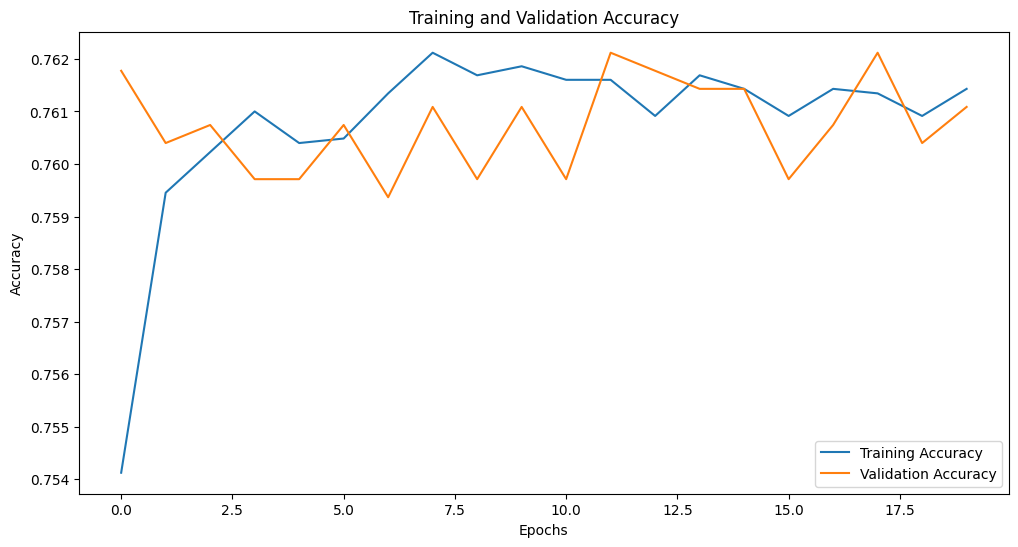

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Analyzing the Results

Check training vs. validation accuracy:
If validation accuracy is much lower than training accuracy, the model might be overfitting.
If both are low, consider improving feature engineering, increasing the model complexity, or training for more epochs.

In [28]:
explainer = shap.KernelExplainer(model.predict, X_test)
subset = X_test.sample(n=100, random_state=42)
shap_values = explainer.shap_values(subset)
shap.summary_plot(shap_values, subset, feature_names=features)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Using 3637 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [ ]:
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_test[:100])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `

IndexError: index 5 is out of bounds for axis 1 with size 5

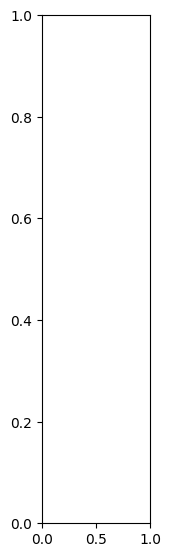

In [30]:
shap.summary_plot(shap_values, X_train, feature_names=features)

In [31]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    X_train,
    feature_names=features,
    class_names=label_encoder.classes_,
    mode='classification'
)
exp = explainer.explain_instance(X_test[0], model.predict, num_features=5)
exp.show_in_notebook()


ModuleNotFoundError: No module named 'lime'